<a href="https://colab.research.google.com/github/annesantos1990/spotify_project/blob/main/Projeto_2_Eslaine_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()


### **Importando as tabelas do BigQuery**

---



In [ ]:
!pip install google-cloud-bigquery

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery
import pandas as pd

# Criar um cliente BigQuery
project_marco2 = 'hipoteses-proj2'
client = bigquery.Client(project=project_marco2)

#especificar minha consulta
query = ("""
SELECT *
FROM `hipoteses-proj2.dados_proj2.unified_table_quartiles`
""")


# Executar a consulta
df = client.query(query).to_dataframe()


# Visualizar os dados
df.head()
print(df.info())


RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7acd03e84c10>)

**Removendo nulos**

---



In [ ]:
df = df.dropna()

###**Separação dos Grupos**

---



In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
# Calcular a média dos streams para cada classificação de cada característica
mean_streams_danceability = df.groupby(['danceability_classification'])['stream'].mean()
mean_streams_valence = df.groupby(['valence_classification'])['stream'].mean()
print(mean_streams_danceability)


danceability_classification
Alto     427418981.457627
Baixo     543027458.83263
Name: stream, dtype: Float64


In [ ]:
# Separar os dados em grupos de baixo e alto para cada característica

#danceability
baixo_streams_danceability = df[df['danceability_classification'] == 'Baixo']['stream']
alto_streams_danceability = df[df['danceability_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_danceability)
print('Alto:', alto_streams_danceability)

#valence
baixo_streams_valence = df[df['valence_classification'] == 'Baixo']['stream']
alto_streams_valence = df[df['valence_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_valence)
print('Alto:', alto_streams_valence)

#energy
baixo_streams_energy = df[df['energy_classification'] == 'Baixo']['stream']
alto_streams_energy = df[df['energy_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#acousticness
baixo_streams_acousticness = df[df['acousticness_classification'] == 'Baixo']['stream']
alto_streams_acousticness = df[df['acousticness_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#instrumentalness
baixo_streams_instrumentalness= df[df['instrumentalness_classification'] == 'Baixo']['stream']
alto_streams_instrumentalness = df[df['instrumentalness_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#liveness
baixo_streams_liveness = df[df['liveness_classification'] == 'Baixo']['stream']
alto_streams_liveness = df[df['liveness_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#speechiness
baixo_streams_speechiness = df[df['speechiness_classification'] == 'Baixo']['stream']
alto_streams_speechiness = df[df['speechiness_classification'] == 'Alto']['stream']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#verificando se tem valores nulos nos grupos:
print('valores nulos:', baixo_streams_danceability.isnull().sum())
print('valores nulos:', alto_streams_danceability.isnull().sum())

Baixo: 1        53909146
2       114546317
3       124407432
4       137070925
5        68216992
          ...    
940     775542072
942    1953533826
943    1047101291
944     843957510
946    1223481149
Name: stream, Length: 711, dtype: Int64
Alto: 0       122763672
29      134294498
35       29562220
36       16011326
42      123216717
          ...    
930    1440757818
931     721975598
938     933815613
941    1605224506
945     863756573
Name: stream, Length: 236, dtype: Int64
Baixo: 1        53909146
2       114546317
3       124407432
4       137070925
5        68216992
          ...    
939    2713922350
940     775542072
943    1047101291
944     843957510
946    1223481149
Name: stream, Length: 711, dtype: Int64
Alto: 0       122763672
6        41210087
9        37091576
12      127027715
29      134294498
          ...    
935    1115880852
938     933815613
941    1605224506
942    1953533826
945     863756573
Name: stream, Length: 236, dtype: Int64
Baixo: 0       1227636

### Transformando em Array

---



In [ ]:
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Convertendo os grupos para arrays NumPy

#danceability
baixo_array_danceability = np.array(baixo_streams_danceability)
alto_array_danceability = np.array(alto_streams_danceability)

#valence
baixo_array_valence = np.array(baixo_streams_valence)
alto_array_valence = np.array(alto_streams_valence)

#energy
baixo_array_energy = np.array(baixo_streams_energy)
alto_array_energy = np.array(alto_streams_energy)

#acousticness
baixo_array_acousticness = np.array(baixo_streams_acousticness)
alto_array_acousticness = np.array(alto_streams_energy)

#instrumentalness
baixo_array_instrumentalness = np.array(baixo_streams_instrumentalness)
alto_array_instrumentalness = np.array(alto_streams_instrumentalness)

#liveness
baixo_array_liveness = np.array(baixo_streams_liveness)
alto_array_liveness = np.array(alto_streams_liveness)

#speechiness
baixo_array_speechiness = np.array(baixo_streams_speechiness)
alto_array_speechiness = np.array(alto_streams_speechiness)

#verificando o tipo de dado:
print(baixo_array_danceability.dtype)
print(alto_array_danceability.dtype)


object
object


In [ ]:
#Conversão para o tipo numérico
!pip install pandas

import pandas as pd

#danceability
baixo_array_danceability = pd.to_numeric(baixo_array_danceability, errors='coerce')
alto_array_danceability = pd.to_numeric(alto_array_danceability, errors='coerce')

#valence
baixo_array_valence = pd.to_numeric(baixo_array_valence, errors='coerce')
alto_array_valence = pd.to_numeric(alto_array_valence, errors='coerce')

#energy
baixo_array_energy = pd.to_numeric(baixo_array_energy, errors='coerce')
alto_array_energy = pd.to_numeric(alto_array_energy, errors='coerce')

#acousticness
baixo_array_acousticness = pd.to_numeric(baixo_array_acousticness, errors='coerce')
alto_array_acousticness= pd.to_numeric(alto_array_acousticness, errors='coerce')

#instrumentalness
baixo_array_instrumentalness = pd.to_numeric(baixo_array_instrumentalness, errors='coerce')
alto_array_instrumentalness = pd.to_numeric(alto_array_instrumentalness, errors='coerce')

#liveness
baixo_array_liveness = pd.to_numeric(baixo_array_liveness, errors='coerce')
alto_array_liveness = pd.to_numeric(alto_array_liveness, errors='coerce')

#speechiness
baixo_array_speechiness = pd.to_numeric(baixo_array_speechiness, errors='coerce')
alto_array_speechiness = pd.to_numeric(alto_array_speechiness, errors='coerce')

In [ ]:
#nova verificação
print(baixo_array_danceability.dtype)
print(alto_array_danceability.dtype)

int64
int64


In [ ]:
#verificando se há pelo menos um valor NaN
print(np.isnan(baixo_array_danceability).any())
print(np.isnan(alto_array_danceability).any())

False
False


### **Teste de Normalidade**

---



In [ ]:
from scipy.stats import shapiro


# Verificando a normalidade do grupo baixo e alto

#danceability (1)
stat_baixo, p_valor_baixo = shapiro(baixo_array_danceability)
print("Grupo Baixo - Estatística do teste:", stat_baixo, "Valor p:", p_valor_baixo)
stat_alto, p_valor_alto= shapiro(alto_array_danceability)
print("Grupo Alto - Estatística do teste:", stat_alto, "Valor p:", p_valor_alto)

#Conclusão do teste
#if p_valor_baixo_1 > 0.05:
 # print("Grupo Baixo - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
 # print("Grupo Baixo - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")
#Conclusão do teste
#if p_valor_alto_1 > 0.05:
#  print("Grupo Alto - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
#  print("Grupo Alto - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")

#valence (2)
#stat_baixo, p_valor_baixo_2 = shapiro(baixo_array_valence)
#print("Grupo Baixo - Estatística do teste:", stat_baixo, "Valor p:", p_valor_baixo)
#stat_alto, p_valor_alto_2 = shapiro(alto_array_valence)
#print("Grupo Alto - Estatística do teste:", stat_alto, "Valor p:", p_valor_alto)
#Conclusão do teste
#if p_valor_baixo_2 > 0.05:
 # print("Grupo Baixo - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
 # print("Grupo Baixo - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")
#Conclusão do teste
#if p_valor_alto_2 > 0.05:
 # print("Grupo Alto - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
 # print("Grupo Alto - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")

#energy (3)
#stat_baixo, p_valor_baixo_3 = shapiro(baixo_array_energy)
#print("Grupo Baixo - Estatística do teste:", stat_baixo, "Valor p:", p_valor_baixo)
#stat_alto, p_valor_alto_3 = shapiro(alto_array_energy)
#print("Grupo Alto - Estatística do teste:", stat_alto, "Valor p:", p_valor_alto)
#Conclusão do teste
#if p_valor_baixo_3 > 0.05:
#  print("Grupo Baixo - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
 # print("Grupo Baixo - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")
#Conclusão do teste
#if p_valor_alto_3 > 0.05:
 # print("Grupo Alto - Com 95% de confiança, os dados são similares a distribuição normal segundo o teste de Shapiro-Will")
#else:
 # print("Grupo Alto - Com 95% de confiança, os dados NÃO são similares a distribuição normal segundo o teste de Shapiro-Will")


Grupo Baixo - Estatística do teste: 0.7761982679367065 Valor p: 4.825661602328998e-30
Grupo Alto - Estatística do teste: 0.7104134559631348 Valor p: 5.815938552368162e-20


## **Teste Estatístico**


---



### Teste

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind

# Lista de testes e seus arrays correspondentes
testes = ['Danceability', 'Valence', 'Energy', 'Acousticness','Instrumentalness', 'Liveness', 'Speechiness']
arrays = [(baixo_array_danceability, alto_array_danceability), (baixo_array_valence, alto_array_valence),(baixo_array_energy, alto_array_energy), (baixo_array_acousticness, alto_array_acousticness), (baixo_array_instrumentalness, alto_array_instrumentalness), (baixo_array_liveness, alto_array_liveness), (baixo_array_speechiness, alto_array_speechiness)]

# Lista para armazenar os resultados
resultados = []

# Loop sobre os testes
for teste, (baixo_array, alto_array) in zip(testes, arrays):
    # Teste de Mann-Whitney U
    if mannwhitneyu(baixo_array, alto_array).pvalue < 0.05:
        estatistica_teste = mannwhitneyu(baixo_array, alto_array).statistic
        p_valor = mannwhitneyu(baixo_array, alto_array).pvalue
        if p_valor > 0.05:
            diferenca_significativa = 'Não'
        else:
            diferenca_significativa = 'Sim'
    # Teste t de Student
    else:
        estatistica_teste = ttest_ind(baixo_array, alto_array).statistic
        p_valor = ttest_ind(baixo_array, alto_array).pvalue
        if p_valor > 0.05:
            diferenca_significativa = 'Não'
        else:
            diferenca_significativa = 'Sim'
    resultados.append([teste, estatistica_teste, p_valor, diferenca_significativa])

# Criando o DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Teste', 'Estatística do Teste', 'Valor-p', 'Diferença Significativa'])

# Exibindo a tabela
print(df_resultados)
#print(tabulate(df_resultados, headers='keys', tablefmt='grid', showindex=False))


              Teste  Estatística do Teste   Valor-p Diferença Significativa
0      Danceability          91423.000000  0.038764                     Sim
1           Valence              1.450275  0.147314                     Não
2            Energy              0.658124  0.510619                     Não
3      Acousticness              0.349773  0.726587                     Não
4  Instrumentalness              1.794559  0.073044                     Não
5          Liveness              0.707211  0.479610                     Não
6       Speechiness          93234.000000  0.010345                     Sim


### Gráficos:

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Criar a figura com a grade de subplots
fig = make_subplots(rows=1, cols=7, subplot_titles=('Danceability', 'Valence', 'Energy', 'acousticness', 'instrumentalness','liveness','speechiness' ))

# danceability
fig.add_trace(go.Box(y=df[df["danceability_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=1)
fig.add_trace(go.Box(y=df[df["danceability_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=1)

#valence
fig.add_trace(go.Box(y=df[df["valence_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=2)
fig.add_trace(go.Box(y=df[df["valence_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=2)

#energy
fig.add_trace(go.Box(y=df[df["energy_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=3)
fig.add_trace(go.Box(y=df[df["energy_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=3)
#acousticness
fig.add_trace(go.Box(y=df[df["acousticness_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=4)
fig.add_trace(go.Box(y=df[df["acousticness_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=4)

#instrumentalness
fig.add_trace(go.Box(y=df[df["instrumentalness_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=5)
fig.add_trace(go.Box(y=df[df["instrumentalness_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=5)

#liveness
fig.add_trace(go.Box(y=df[df["liveness_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=6)
fig.add_trace(go.Box(y=df[df["liveness_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=6)

#speechiness
fig.add_trace(go.Box(y=df[df["speechiness_classification"] == "Baixo"]["stream"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=7)
fig.add_trace(go.Box(y=df[df["speechiness_classification"] == "Alto"]["stream"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=7)

# Mostrar a figura
fig.show()


## **Regressão Linear**

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Suponha que `df` já foi carregado ou definido anteriormente

# Lista de hipóteses
hipoteses = ['Hipótese 1', 'Hipótese 2.1', 'Hipótese 2.2 ', 'Hipótese 2.3', 'Hipótese 3']

# Lista de variáveis independentes e dependente correspondentes a cada hipótese
variaveis_por_hipotese = [
    {'independentes': ['bpm'], 'dependente': 'stream'},
    {'independentes': ['in_spotify_charts'], 'dependente': 'in_deezer_charts'},
    {'independentes': ['in_spotify_charts'], 'dependente': 'in_apple_charts'},
    {'independentes': ['in_spotify_charts'], 'dependente': 'in_shazam_charts_moda'},
    {'independentes': ['total_playlists'], 'dependente': 'stream'}
]

# Lista para armazenar os resultados
resultados = []

# Loop sobre as hipóteses
for hipotese, vars_hipotese in zip(hipoteses, variaveis_por_hipotese):
    # Criando o conjunto de dados
    X = df[vars_hipotese['independentes']].values
    y = df[vars_hipotese['dependente']].values

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criando e ajustando o modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = modelo.predict(X_test)

    # Calculando o coeficiente de determinação (R²)
    r2 = r2_score(y_test, y_pred)

    # Calculando o coeficiente de correlação de Pearson (r)
    r, _ = pearsonr(df[vars_hipotese['independentes'][0]], df[vars_hipotese['dependente']])

    # Salvando os resultados
    resultados.append([hipotese, r2, modelo.coef_, r])

# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Hipótese', 'R²', 'Coeficientes do Modelo', 'R-Pearson'])

# Exibindo a tabela
print(tabulate(df_resultados, headers='keys', tablefmt='grid', showindex=False))



+--------------+--------------+--------------------------+-------------+
| Hipótese     |           R² |   Coeficientes do Modelo |   R-Pearson |
+==============+==============+==========================+=============+
| Hipótese 1   | -0.000340902 |            -44954.6      |  -0.0023061 |
+--------------+--------------+--------------------------+-------------+
| Hipótese 2.1 |  0.211732    |                 0.199304 |   0.599986  |
+--------------+--------------+--------------------------+-------------+
| Hipótese 2.2 |  0.27022     |                 1.52885  |   0.551428  |
+--------------+--------------+--------------------------+-------------+
| Hipótese 2.3 |  0.307194    |                 4.73662  |   0.571838  |
+--------------+--------------+--------------------------+-------------+
| Hipótese 3   |  0.597982    |             43568.6      |   0.771199  |
+--------------+--------------+--------------------------+-------------+


### **Gráficos**

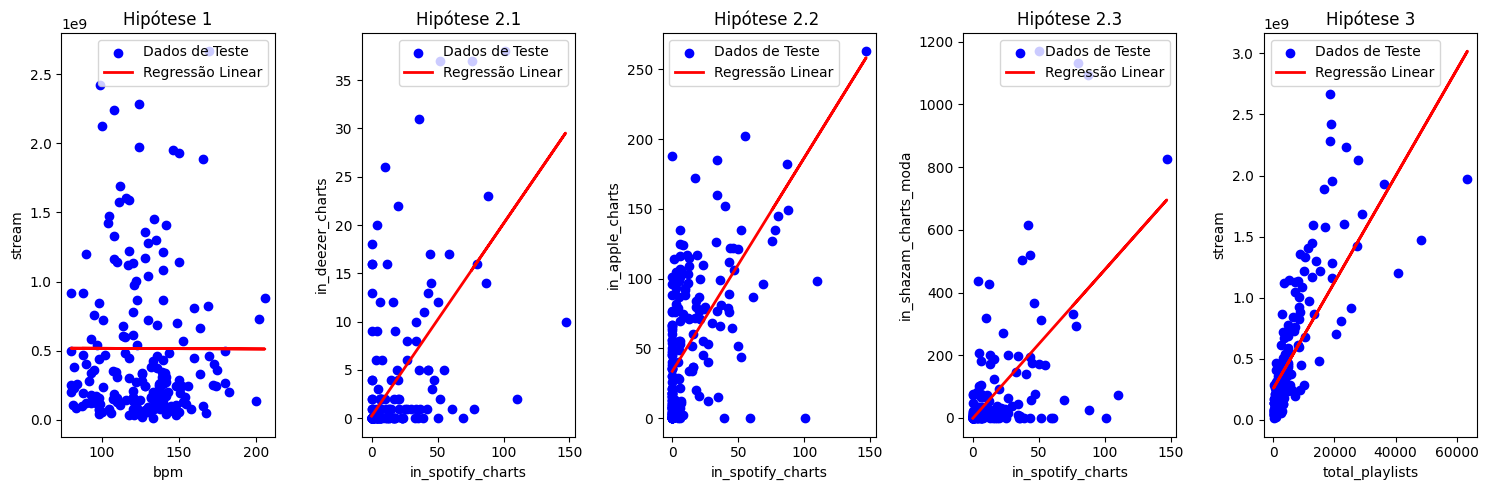

In [ ]:
import matplotlib.pyplot as plt

# Configurando o layout dos subplots
fig, axs = plt.subplots(1, len(hipoteses), figsize=(15, 5))

# Loop sobre as hipóteses
for i, (hipotese, vars_hipotese) in enumerate(zip(hipoteses, variaveis_por_hipotese)):
    # Criando o conjunto de dados
    X = df[vars_hipotese['independentes']].values
    y = df[vars_hipotese['dependente']].values

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criando e ajustando o modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = modelo.predict(X_test)

    # Plotando o gráfico da regressão linear
    axs[i].scatter(X_test[:, 0], y_test, color='blue', label='Dados de Teste')
    axs[i].plot(X_test[:, 0], y_pred, color='red', linewidth=2, label='Regressão Linear')
    axs[i].set_xlabel(vars_hipotese['independentes'][0])
    axs[i].set_ylabel(vars_hipotese['dependente'])
    axs[i].set_title(f'{hipotese}')
    axs[i].legend()

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()
